In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded Excel file
file_path = 'Mahasiswa Lulus Undip.xlsx'
xls = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
xls.sheet_names


['Data Mahasiswa Lulus']

In [2]:
# Load the data from the "Data Mahasiswa Lulus" sheet
data_mahasiswa = xls.parse('Data Mahasiswa Lulus')

# Display the first few rows to inspect the data
data_mahasiswa.head()

,NIM,Nama,Gol UKT,Fakultas,Prodi,Tanggal Lulus,IPS1,IPS2,IPS3,IPS4,...,IPK,Lama Studi,Tahun,bulan,Hari,Total Hari,Total Lama studi,Total Bulan,Total Tahun,Kelulusan Tepat Waktu
0,24010314120050,WILDAN AZIZI,5,SAINS DAN MATEMATIKA,Informatika S1,11/01/2022,3.29,2.36,3.798265,2.64,...,2.91,7 tahun 4 bulan 10 hari,7,4,10,2685,"7 Tahun, 4 Bulan, 8 Hari",88,7.35,Tepat Waktu
1,24010314120057,Rizal Muhamad,0,SAINS DAN MATEMATIKA,Informatika S1,05/10/2021,3.16,2.88,3.260000,2.95,...,3.38,7 tahun 1 bulan 3 hari,7,1,3,2588,"7 Tahun, 1 Bulan, 2 Hari",85,7.09,Tepat Waktu
2,24010314120062,DENNIS LARASWATI,0,SAINS DAN MATEMATIKA,Informatika S1,31/12/2021,2.68,2.86,2.650000,2.32,...,2.93,7 tahun 3 bulan 29 hari,7,3,29,2674,"7 Tahun, 3 Bulan, 26 Hari",88,7.32,Tepat Waktu
3,24010314130104,ZAENAL ARIFIN,4,SAINS DAN MATEMATIKA,Informatika S1,31/12/2021,2.12,2.05,2.550000,3.00,...,2.93,7 tahun 3 bulan 29 hari,7,3,29,2674,"7 Tahun, 3 Bulan, 26 Hari",88,7.32,Tepat Waktu
4,24010314130106,NABILLA RAMADHANTI,4,SAINS DAN MATEMATIKA,Informatika S1,31/12/2021,3.47,3.12,3.120000,3.16,...,3.39,7 tahun 3 bulan 29 hari,7,3,29,2674,"7 Tahun, 3 Bulan, 26 Hari",88,7.32,Tepat Waktu


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
import pickle


# Select relevant features (IPS1 - IPS8, IPK) as input
features = ['Gol UKT','IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'IPK']
X = data_mahasiswa[features]

# Total Hari as the target
y = data_mahasiswa['Total Tahun']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)
# Save the scaler to a file using pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input for Gru (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)


# Predict the total days
y_pred = model.predict(X_test)

# Example: Print some predictions
for i in range(5):
    print(f"True: {y_test.iloc[i]}, Predicted: {y_pred[i][0]}")

print(f"Test Mean Squared Error: {mse}")


Epoch 1/200


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 - 1s - 66ms/step - loss: 21.1889 - val_loss: 22.2003
Epoch 2/200
11/11 - 0s - 3ms/step - loss: 16.5123 - val_loss: 17.0155
Epoch 3/200
11/11 - 0s - 3ms/step - loss: 11.1644 - val_loss: 11.1912
Epoch 4/200
11/11 - 0s - 3ms/step - loss: 6.1604 - val_loss: 6.2567
Epoch 5/200
11/11 - 0s - 3ms/step - loss: 3.3141 - val_loss: 4.3830
Epoch 6/200
11/11 - 0s - 3ms/step - loss: 3.0162 - val_loss: 4.2445
Epoch 7/200
11/11 - 0s - 3ms/step - loss: 2.9270 - val_loss: 4.2859
Epoch 8/200
11/11 - 0s - 3ms/step - loss: 2.8072 - val_loss: 4.3299
Epoch 9/200
11/11 - 0s - 3ms/step - loss: 2.7767 - val_loss: 4.2603
Epoch 10/200
11/11 - 0s - 5ms/step - loss: 2.7225 - val_loss: 4.0696
Epoch 11/200
11/11 - 0s - 3ms/step - loss: 2.6775 - val_loss: 3.9979
Epoch 12/200
11/11 - 0s - 3ms/step - loss: 2.6243 - val_loss: 3.9709
Epoch 13/200
11/11 - 0s - 2ms/step - loss: 2.5773 - val_loss: 3.9081
Epoch 14/200
11/11 - 0s - 3ms/step - loss: 2.5274 - val_loss: 3.7731
Epoch 15/200
11/11 - 0s - 3ms/step - loss: 2.479

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
True: 4.13, Predicted: 3.729562997817993
True: 5.66, Predicted: 5.441720485687256
True: 3.76, Predicted: 4.123908519744873
True: 3.82, Predicted: 3.8747270107269287
True: 4.48, Predicted: 4.553256511688232
Test Mean Squared Error: 0.8021382689476013


In [20]:
# Save the model to an .h5 file
model.save("model_gru_ltw.h5")

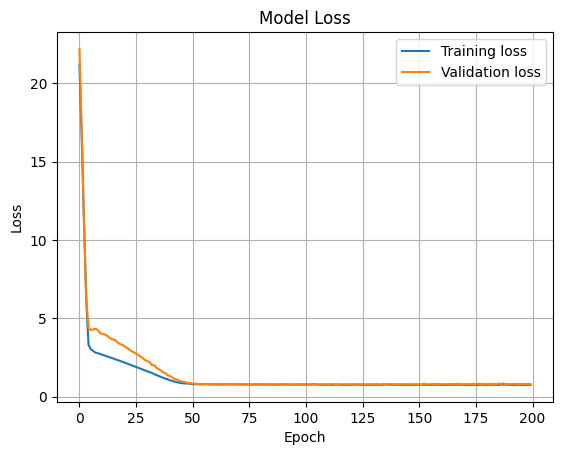

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

golukt = 8
ips1 = 2.89
ips2 = 3.47
ips3 = 3.23
ips4 = 1.44
ips5 = 3.23
ipk = 3
# Load model GRU yang telah dilatih
model = load_model("model_gru_ltw.h5")
model.compile(loss='mse', optimizer="adam")
model.summary()
input_data = np.array([[golukt, ips1, ips2, ips3, ips4, ips5, ipk]]).astype(np.float32)
# Load the model from a .pkl file
with open("scaler.pkl", "rb") as f:
    scaler_model = pickle.load(f)
    
input_data = scaler_model.transform(input_data)
input_data = np.reshape(input_data, (input_data.shape[0], 1, input_data.shape[1]))


# Lakukan prediksi menggunakan model GRU
hasil_prediksi = model.predict(input_data)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 64)             │        14,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,129 (63.00 KB)

 Trainable params: 16,129 (63.00 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [30]:
hasil_prediksi[0][0]

5.494349